# Heat Maps

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# loading dataset
fuel_econ = pd.read_csv("data/fuel_econ.csv")
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### Default heat plot using `Matplotlib.pyplot.hist2d()` function

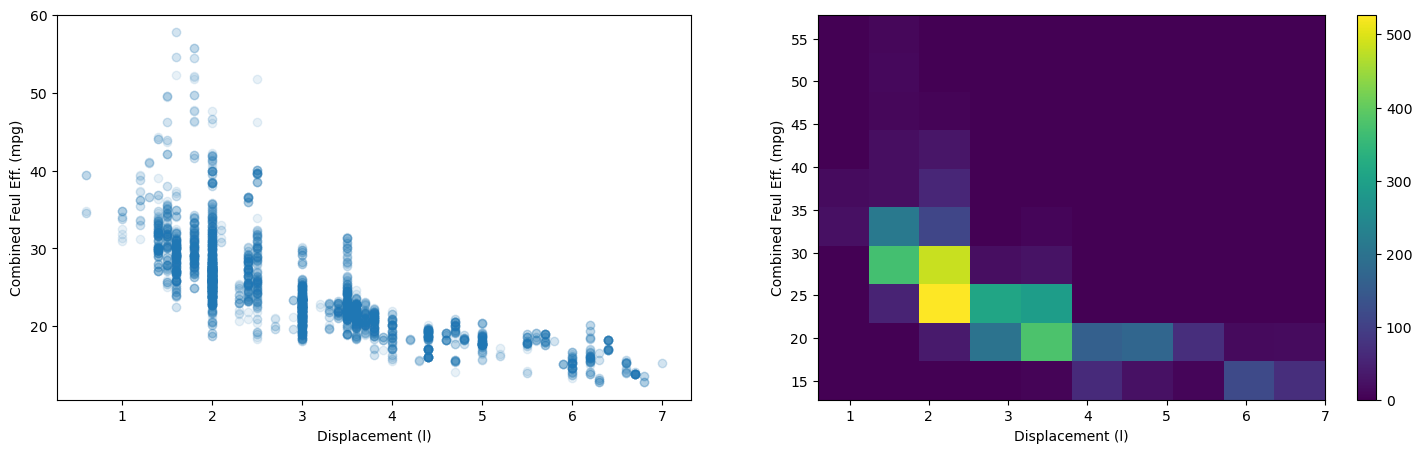

In [18]:
plt.figure(figsize=[18, 5])

plt.subplot(1, 2, 1)
plt.scatter(data=fuel_econ, x='displ', y='comb', alpha=.1)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Feul Eff. (mpg)');

plt.subplot(1, 2, 2)
plt.hist2d(data=fuel_econ, x='displ', y='comb')
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Feul Eff. (mpg)')

plt.show()

### Heat plot - Set a minimum bound on counts and a reverse color map

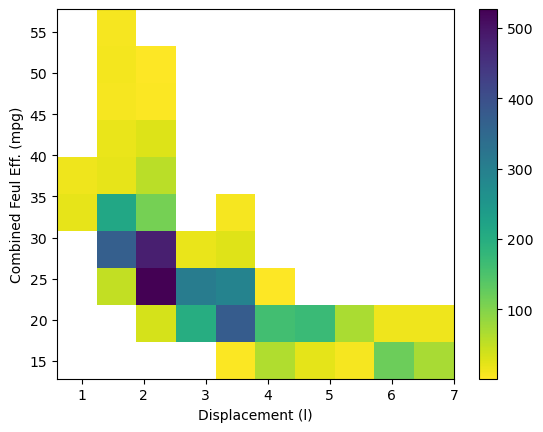

In [26]:
# Use cmin to set a minimum bound of counts.
# Use cmap to reverse the color map.
plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Feul Eff. (mpg)');

### Heat plot - Specify bin edges

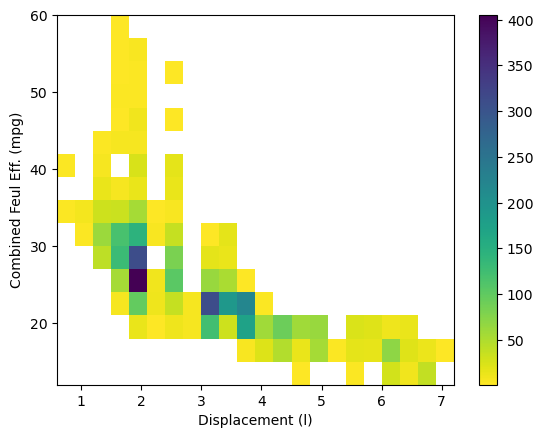

In [39]:
# Specify bin edges
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)

plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5,
           cmap='viridis_r', bins=[bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Feul Eff. (mpg)');

### Add text annotation on each cell using `pyplot.text()` function

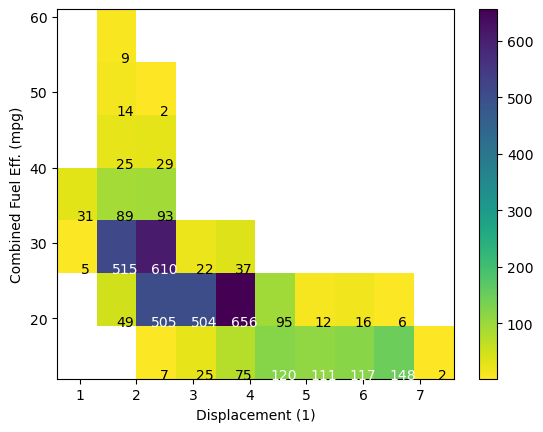

In [40]:
# Specify bin edges 
bins_x = np.arange(0.6, 7+0.7, 0.7)
bins_y = np.arange(12, 58+7, 7)
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
h2d = plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])

plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')